<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns

from pprint import pprint
from scipy.stats import chisquare
from scipy.stats import spearmanr
from scipy.stats import pearsonr

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#Load CSV file into Raw SATS
raw_sats = ''
with open('sat_scores.csv', 'r') as file_pointer:
    raw_sats = file_pointer.read()

In [3]:
#Replace all the " with ' and split the file into rows
clean_sats = raw_sats.splitlines()

_HEADER_INDEX = 0 #Header Index is currently set to 0 for this file
_ROW_INDEX = _HEADER_INDEX + 1
_ROW_DELIMITER = ',' #Data source is a CSV file

#Split the Clean SATS file into Headers and Rows and get the total count
#Header and Details split on ',' delimiter
sats_header = clean_sats[_HEADER_INDEX].split(_ROW_DELIMITER)
sats_details = [row.split(_ROW_DELIMITER) for row in clean_sats[_ROW_INDEX:]]

#Display the Number and Details of SATS Records
pprint('There are total of {} SATS records'.format(len(sats_details)))
pprint(sats_header)
pprint(sats_details)

'There are total of 52 SATS records'
['State', 'Rate', 'Verbal', 'Math']
[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515'],
 ['NY', '77', '495', '505'],
 ['NH', '72', '520', '516'],
 ['RI', '71', '501', '499'],
 ['PA', '71', '500', '499'],
 ['VT', '69', '511', '506'],
 ['ME', '69', '506', '500'],
 ['VA', '68', '510', '501'],
 ['DE', '67', '501', '499'],
 ['MD', '65', '508', '510'],
 ['NC', '65', '493', '499'],
 ['GA', '63', '491', '489'],
 ['IN', '60', '499', '501'],
 ['SC', '57', '486', '488'],
 ['DC', '56', '482', '474'],
 ['OR', '55', '526', '526'],
 ['FL', '54', '498', '499'],
 ['WA', '53', '527', '527'],
 ['TX', '53', '493', '499'],
 ['HI', '52', '485', '515'],
 ['AK', '51', '514', '510'],
 ['CA', '51', '498', '517'],
 ['AZ', '34', '523', '525'],
 ['NV', '33', '509', '515'],
 ['CO', '31', '539', '542'],
 ['OH', '26', '534', '439'],
 ['MT', '23', '539', '539'],
 ['WV', '18', '527', '512'],
 ['ID', '17', '543', '542'],
 ['TN', '13', '562', '553'],

In [4]:
#Transpose SATS by using np.array and store as a dictionary
np_sats_details = np.transpose(np.array(sats_details))
    
#Build the SATS Dictionary
sats_dict = dict(zip(sats_header, np_sats_details))

#Perform Data Conversion to Float
_SATS_SCORE_COLUMNS = ['Rate', 'Math', 'Verbal']
for score_column in _SATS_SCORE_COLUMNS:
    sats_dict[score_column] = list(map(int, sats_dict[score_column]))

#Check the SATS Dictionary
pprint(sats_dict)

{'Math': [510,
          513,
          515,
          505,
          516,
          499,
          499,
          506,
          500,
          501,
          499,
          510,
          499,
          489,
          501,
          488,
          474,
          526,
          499,
          527,
          499,
          515,
          510,
          517,
          525,
          515,
          542,
          439,
          539,
          512,
          542,
          553,
          542,
          589,
          550,
          545,
          572,
          589,
          580,
          554,
          568,
          561,
          577,
          562,
          596,
          550,
          570,
          603,
          582,
          599,
          551,
          514],
 'Rate': [82,
          81,
          79,
          77,
          72,
          71,
          71,
          69,
          69,
          68,
          67,
          65,
          65,
          63,
          60,
         

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
#Create a DataFrame with SAT Dictionary
sats_df1 = pd.DataFrame(sats_dict)
sats_df1

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [6]:
#Create a DataFrame with using Pandas read_csv()
sats_df2 = pd.read_csv('sat_scores.csv')
sats_df2

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [7]:
#Using pd.read_csv is faster as I do not have to transpose and build a dictionary unlike the previous question

In [8]:
sats_df1.info(), sats_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


(None, None)

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
#Use the Data From from Pandas read_csv()
sats_df2.head(10)

#Verbal and Math columns are SATS scores (MEAN), State is for each state in the US
#Rate is the percentile

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
#Verbal and Math columns are SATS scores (MEAN), State (2 letter) is for each state in the US
#Rate is the percentile
sats_df2.info()
sats_df2.describe()
sats_df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


(52, 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [11]:
def distribution_plotter(column, data_set):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data_set[column], hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

/Users/neilcabrera/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


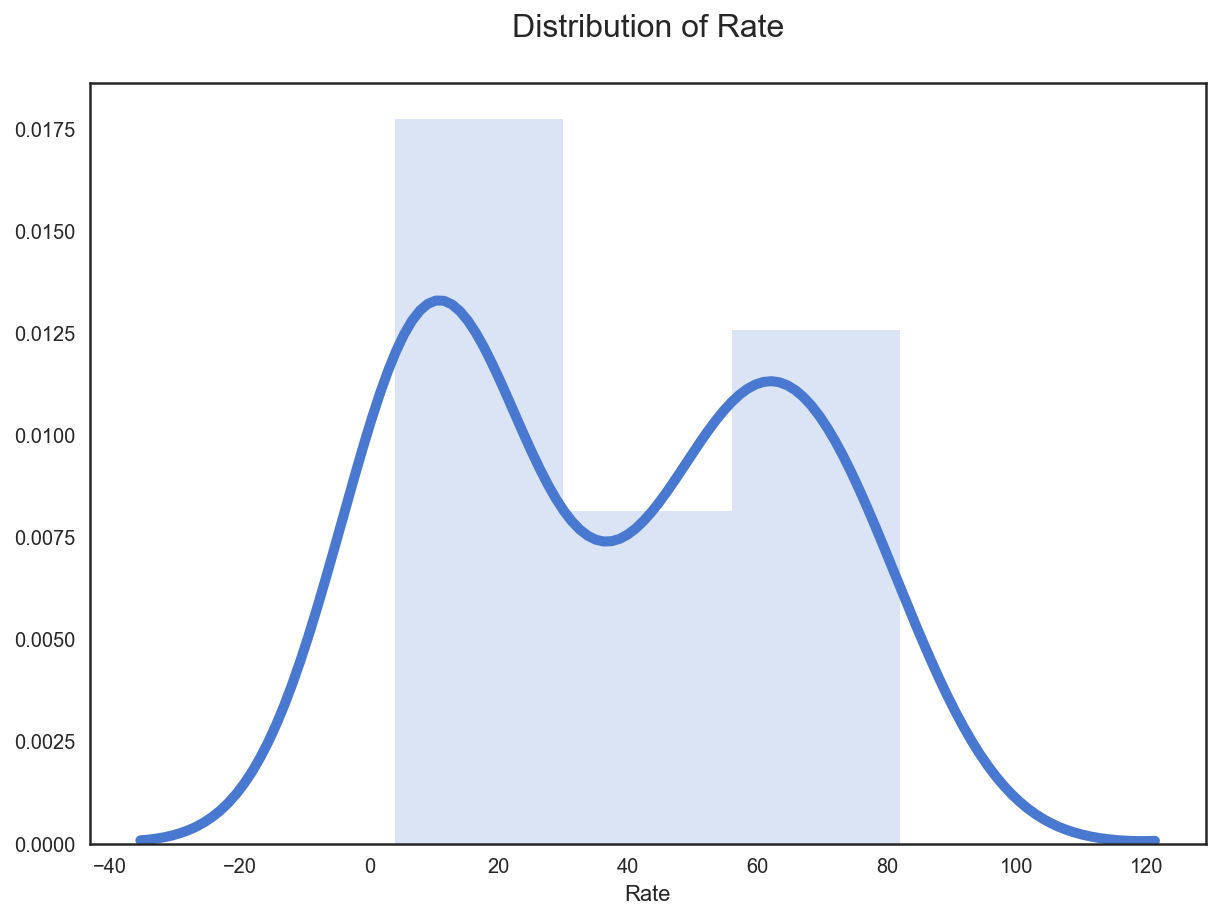

In [12]:
distribution_plotter('Rate', sats_df2)

/Users/neilcabrera/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


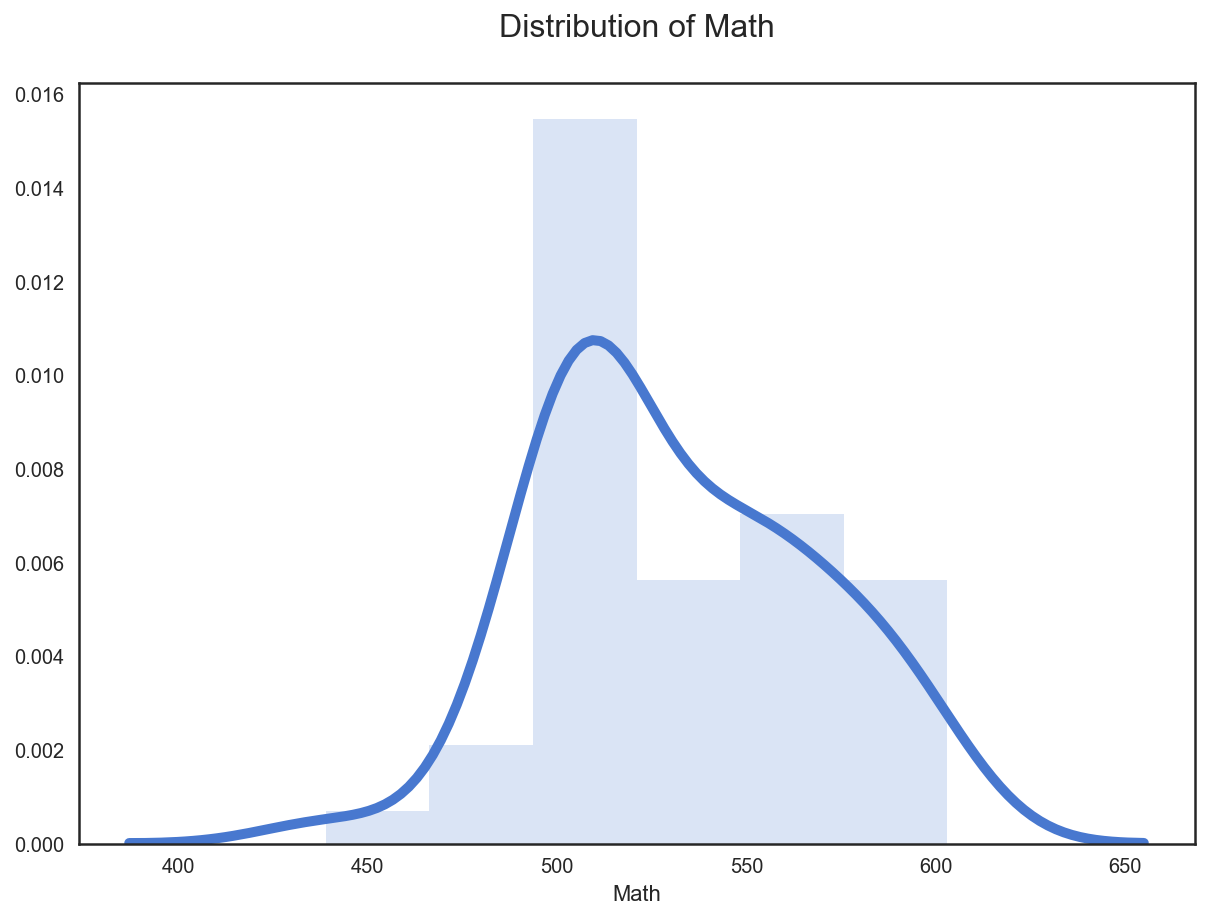

In [13]:
distribution_plotter('Math', sats_df2)

/Users/neilcabrera/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


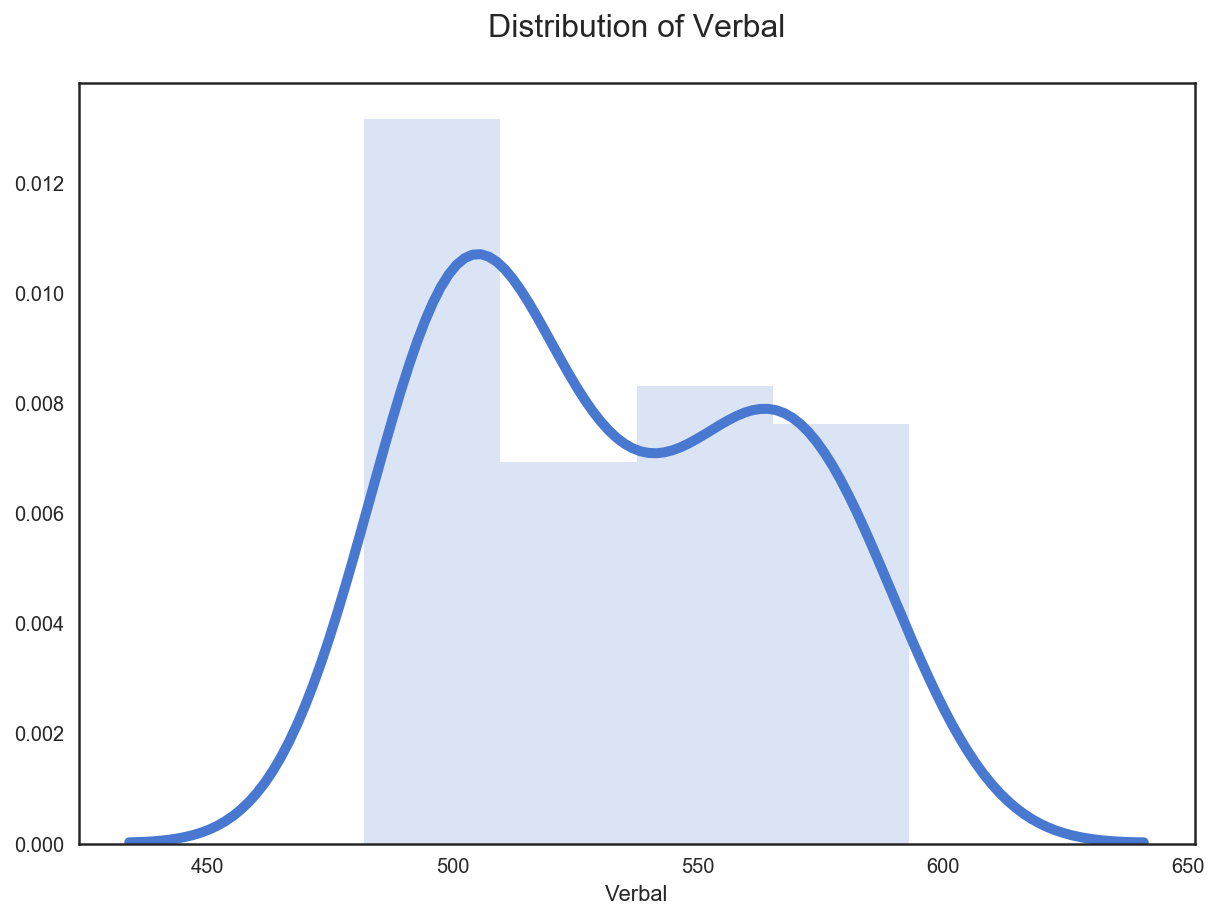

In [14]:
distribution_plotter('Verbal', sats_df2)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

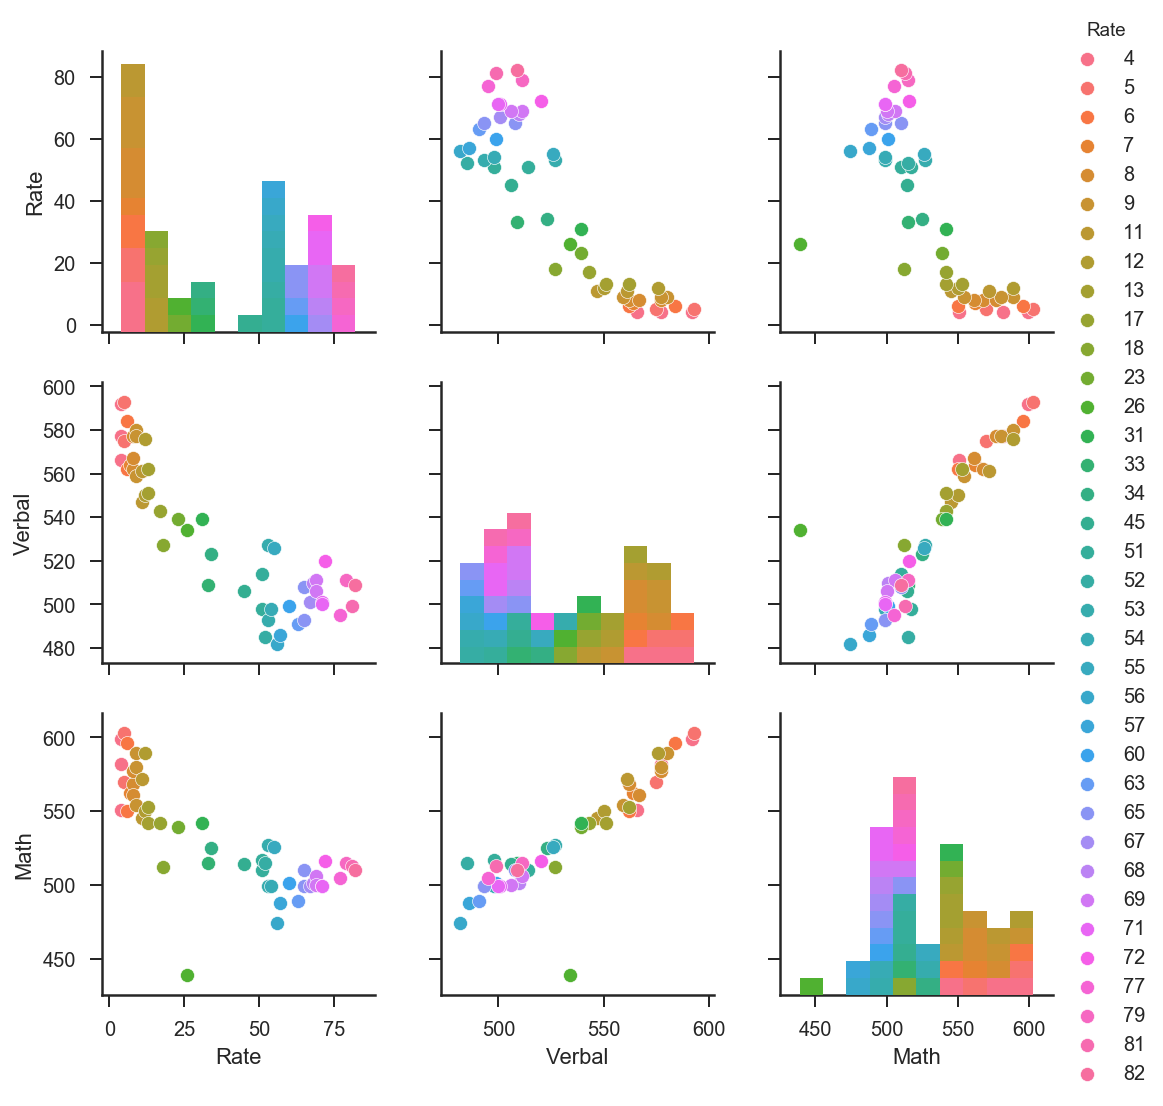

In [15]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(sats_df2, hue='Rate')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

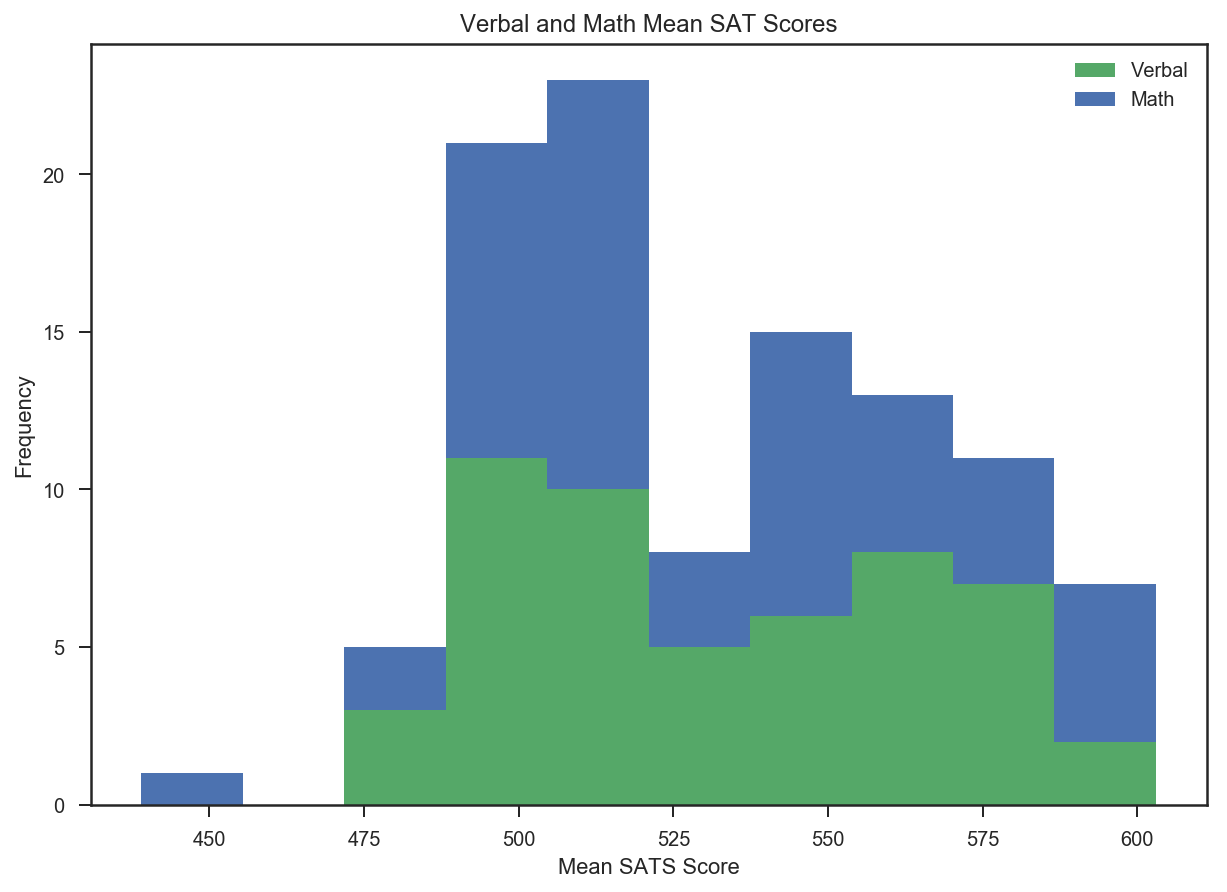

In [16]:
plt.xlabel('Mean SATS Score')
plt.ylabel('Frequency')
plt.title('Verbal and Math Mean SAT Scores')
plt.hist([sats_df2['Verbal'],sats_df2['Math']], stacked=True, color = ['g','b'])
plt.gca().legend(['Verbal', 'Math'])
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

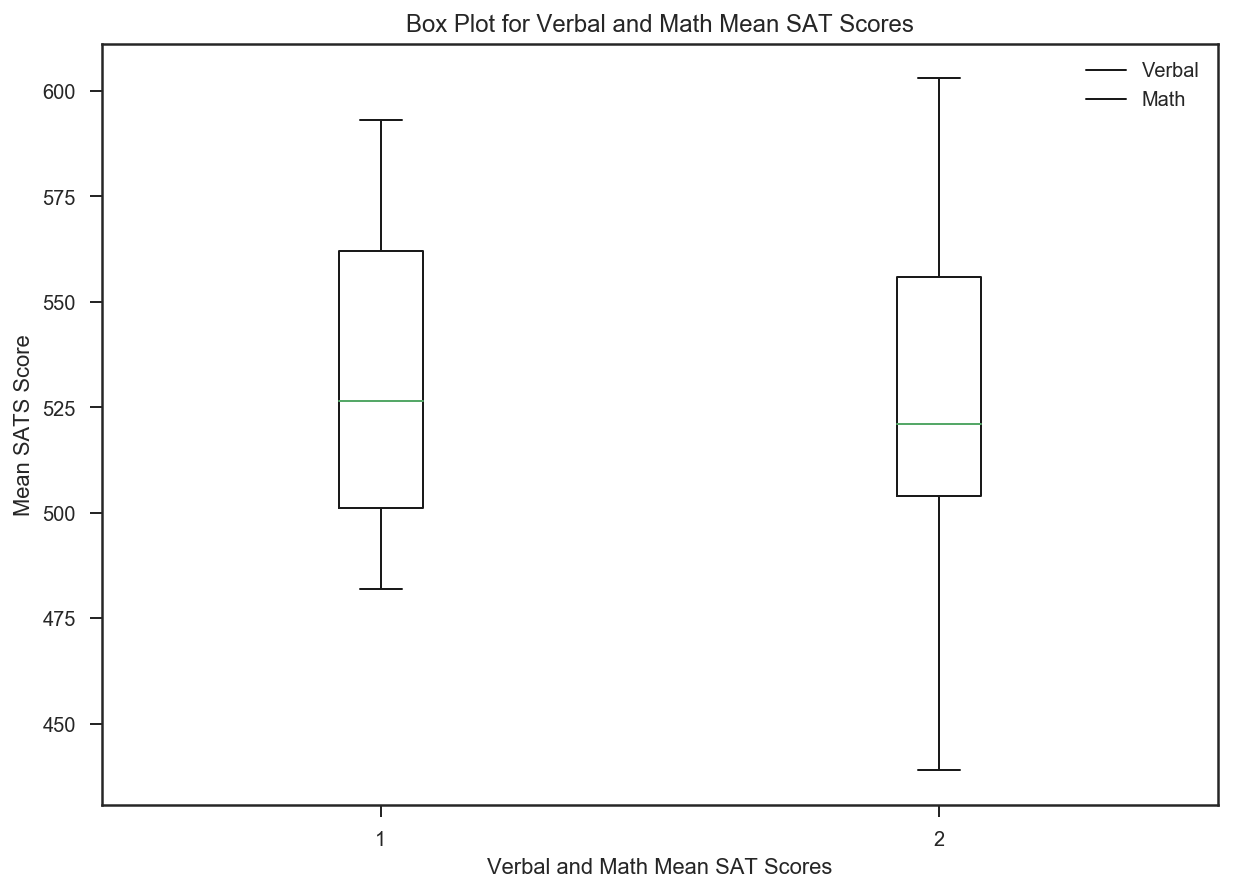

In [17]:
plt.xlabel('Verbal and Math Mean SAT Scores')
plt.ylabel('Mean SATS Score')
plt.title('Box Plot for Verbal and Math Mean SAT Scores')
plt.boxplot([sats_df2['Verbal'],sats_df2['Math']])
plt.gca().legend(['Verbal', 'Math'])
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


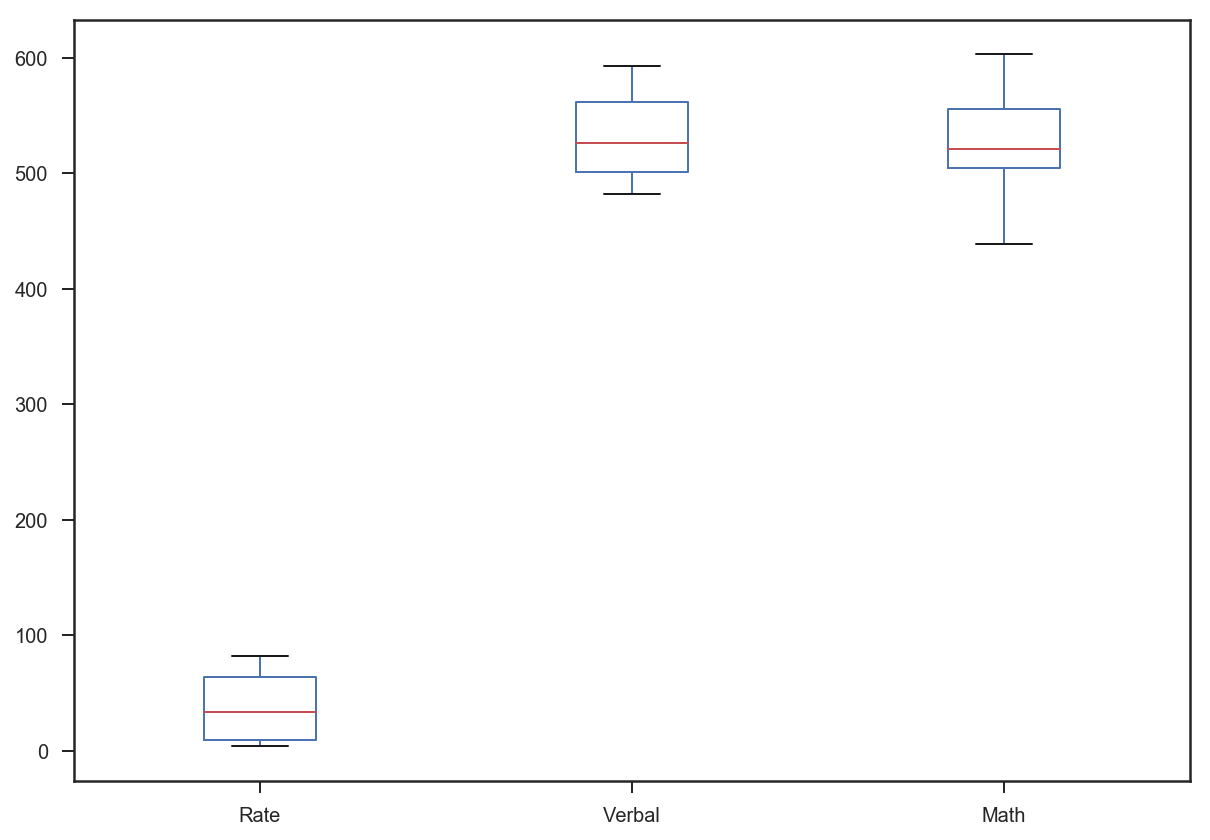

In [18]:
#Output does not make sense to just put them all together as they are not the same scale
sats_df2.plot.box()

In [74]:
#Create a Copy of SATS_DF2 and add 2 columns by converting the Math and Verbal into equivalent percentiles
#I think converting both Verbal and Math to their respective percentiles will make sense and then compare it with
#Rate (percentile), to show the contrast
sats_df3 = sats_df2.copy(deep=True)
sats_df3['Combined'] = sats_df3['Math'] + sats_df3['Verbal']
sats_df3['Combined Percentile'] = [stats.percentileofscore(sats_df3['Combined'].values, i) for i in sats_df3['Combined'].values]
sats_df3['Math Percentile'] = [stats.percentileofscore(sats_df3['Math'].values, i) for i in sats_df3['Math'].values]
sats_df3['Verbal Percentile'] = [stats.percentileofscore(sats_df3['Verbal'].values, i) for i in sats_df3['Verbal'].values]

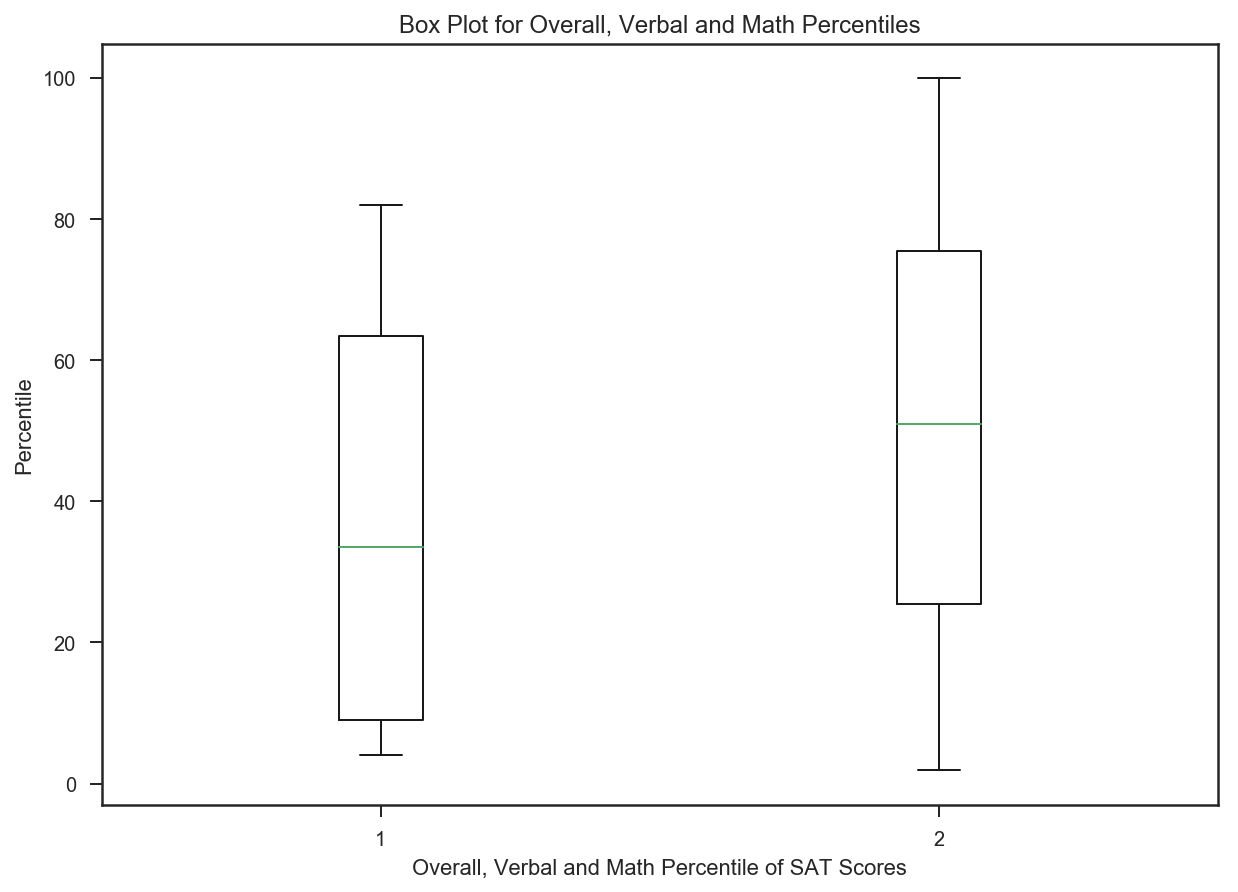

In [75]:
plt.xlabel('Overall, Verbal and Math Percentile of SAT Scores')
plt.ylabel('Percentile')
plt.title('Box Plot for Overall, Verbal and Math Percentiles')
plt.boxplot([sats_df3['Rate'],sats_df3['Combined Percentile']])
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
sats_df2[sats_df2['Verbal'] > sats_df2['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [22]:
#There are 24 states which are above the mean, out of 52 (inclduing State='ALL')
#Scores above the mean are almost half of the overall distrubution, with the rest of the scores on the other side 
sats_df2[sats_df2['Verbal'] > sats_df2['Verbal'].mean()]['Verbal'].count()

24

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [23]:
sats_df2[sats_df2['Verbal'] > sats_df2['Verbal'].median()]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [24]:
#There are 26 states which are above the median, out of 52 (inclduing State='ALL')
#Median is closer to the center of the distribution 
sats_df2[sats_df2['Verbal'] > sats_df2['Verbal'].median()]['Verbal'].count()

26

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [25]:
sats_df2['Verbal - Math'] = sats_df2['Verbal'] - sats_df2['Math']
sats_df2

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [26]:
new_sats_df1 = sats_df2.sort_values('Verbal - Math', ascending=0).head(10).copy(deep=True)
new_sats_df1

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15
45,AR,6,562,550,12
32,NM,13,551,542,9
31,TN,13,562,553,9
9,VA,68,510,501,9
16,DC,56,482,474,8
8,ME,69,506,500,6
41,OK,8,567,561,6


In [27]:
new_sats_df2 = sats_df2.sort_values('Verbal - Math', ascending=1).head(10).copy(deep=True)
new_sats_df2

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14
33,IL,12,576,589,-13
44,WI,6,584,596,-12
36,MI,11,561,572,-11
3,NY,77,495,505,-10
47,IA,5,593,603,-10
37,MN,9,580,589,-9
51,All,45,506,514,-8


In [28]:
new_sats_df1.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [29]:
new_sats_df2.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [30]:
#Exclude State and Verbal-Math Columns
sats_df2[['Rate','Verbal','Math']].corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


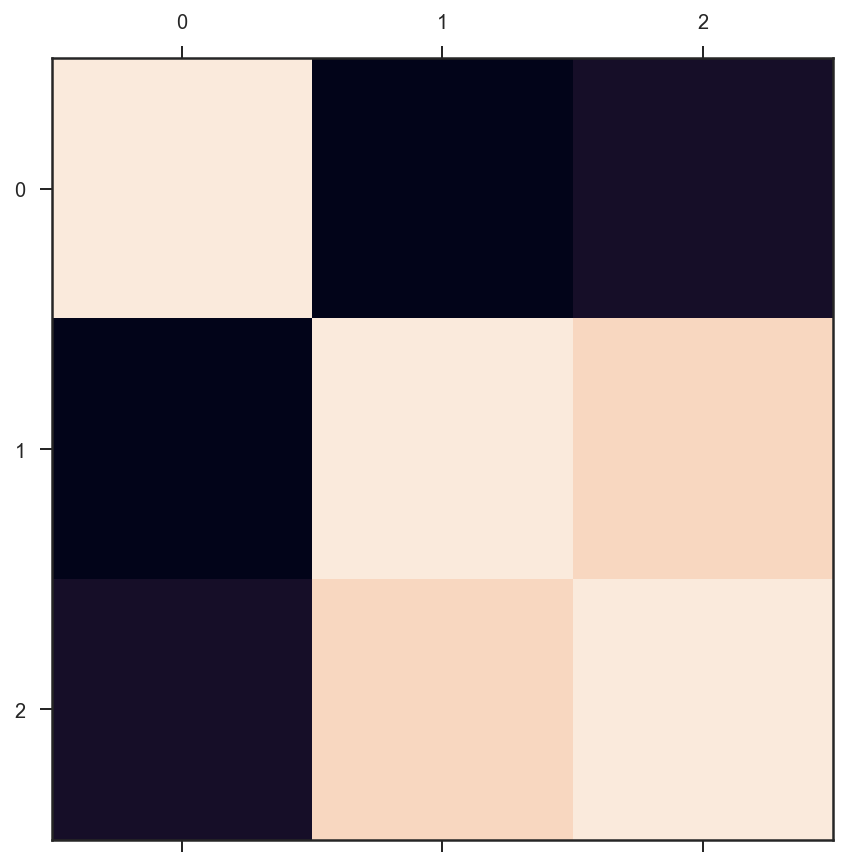

In [31]:
#Verbal and Math have a positive correlation
plt.matshow(sats_df2[['Rate','Verbal','Math']].corr())

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [32]:
sats_df2.describe()

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [33]:
# 1) Covariance - measuring the Variance between two variables
#    Correlation - normalizing the Covariance
# 2) Cauchy–Schwarz inequality - basis for correlation
# 3) Correlation is preferred as we are comparing more than 2 variables, plus it is on a normalized scale which makes
# more sense to see values from -1 to 1

#Exclude State and Verbal-Math Columns
sats_df2[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
#Create a DataFrame with using Pandas read_csv()
drug_use_df = pd.read_csv('drug-use-by-age.csv')
drug_use_df

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [35]:
#Check for any Null or NA
drug_use_df[drug_use_df.isnull().any(axis=1)]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency


In [36]:
drug_use_df[drug_use_df.isna().any(axis=1)]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency


In [37]:
#Check other information about this dataset
drug_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [38]:
# Some rows have - values, change to 0
drug_use_df[['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency','meth-frequency']]

,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,5.0,-,35.5,19.0,24.5,-
1,1.0,3.0,-,12.0,41.0,5.0
2,5.5,-,2.0,5.0,4.5,24.0
3,4.0,9.5,1.0,5.5,3.0,10.5
4,7.0,1.0,66.5,3.0,4.0,36.0
5,5.0,21.0,64.0,4.0,6.0,48.0
6,5.0,10.0,46.0,4.0,7.0,12.0
7,5.5,2.0,180.0,3.0,7.5,105.0
8,8.0,5.0,45.0,4.0,12.0,12.0
9,5.0,17.0,30.0,2.0,13.5,2.0


In [39]:
drug_use_df.replace('-',0, inplace=True)
for column in ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 'oxycontin-frequency','meth-frequency']:
    drug_use_df[column] = drug_use_df[column].astype(float)

#After Cleanup, get some basic info
drug_use_df.info()
drug_use_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [40]:
#Further Cleanup of Column Names
drug_use_df.columns = drug_use_df.columns.str.capitalize()
drug_use_df.columns = drug_use_df.columns.str.replace('-use',' Use')
drug_use_df.columns = drug_use_df.columns.str.replace('-frequency',' Frequency')

#Convert N to float
drug_use_df['N'] = drug_use_df['N'].astype(float)

#Check a Few Records
drug_use_df.head(5)

,Age,N,Alcohol Use,Alcohol Frequency,Marijuana Use,Marijuana Frequency,Cocaine Use,Cocaine Frequency,Crack Use,Crack Frequency,...,Oxycontin Use,Oxycontin Frequency,Tranquilizer Use,Tranquilizer Frequency,Stimulant Use,Stimulant Frequency,Meth Use,Meth Frequency,Sedative Use,Sedative Frequency
0,12,2798.0,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757.0,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792.0,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956.0,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058.0,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [41]:
#Create a new Copy of the Clean DF
drug_use_clean_df = drug_use_df.copy(deep=True)

In [42]:
drug_use_clean_df.columns

Index(['Age', 'N', 'Alcohol Use', 'Alcohol Frequency', 'Marijuana Use',
       'Marijuana Frequency', 'Cocaine Use', 'Cocaine Frequency', 'Crack Use',
       'Crack Frequency', 'Heroin Use', 'Heroin Frequency', 'Hallucinogen Use',
       'Hallucinogen Frequency', 'Inhalant Use', 'Inhalant Frequency',
       'Pain-releiver Use', 'Pain-releiver Frequency', 'Oxycontin Use',
       'Oxycontin Frequency', 'Tranquilizer Use', 'Tranquilizer Frequency',
       'Stimulant Use', 'Stimulant Frequency', 'Meth Use', 'Meth Frequency',
       'Sedative Use', 'Sedative Frequency'],
      dtype='object')

In [43]:
drug_use_clean_df['Age']

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: Age, dtype: object

In [44]:
#Based on the Columns and the Values in the Age Column, the data is messed up
#Drug Use can be grouped into different classifications (by chemical composition, effects or legal)

#For this EDA, I will go with Classification by Effects
#SOURCE: https://www.addictioncenter.com/drugs/drug-classifications/
#Depressants: Heroin, Alcohol, Oxycontin, Marijuana, Sedative
#Stimulants: Cocaine, Crack, Meth, Marijuana, Stimulant
#Hallucinogen: Marijuana, Hallucinogens
#Inhalant: Inhalant
#Others: Pain Reliever, Tranquilizer

_DEPRESSANTS = ['Heroin use', 'Alcohol use', 'Oxycontin use', 'Marijuana use', 'Sedative use']
_STIMULANTS = ['Cocaine use', 'Crack use', 'Meth use', 'Marijuana use', 'Stimulant use']
_HALLUCINOGENS = ['Marijuana use', 'Hallucinogen use']
_INHALANTS = ['Inhalant use']
_OTHERS = ['Pain-releiver use', 'Tranquilizer use']

#AGE Grouping
#Teens: 12 to 17
#Young Adults: 18 to 34
#Middle Age Adults: 35 to 64
#Older Adults: 65 and above
_TEENS = ['12','13','14','15','16','17']
_YOUNG_ADULTS = ['18', '19', '20', '21', '22-23', '24-25', '26-29', '30-34']
_MIDDLE_ADULTS = ['35-49', '50-64']
_OLDER_ADULTS = ['65+']

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [45]:
#Questions:
# 1) Distribution of Drugs by classification
#       For each classification, which drug has the highest usage in the population
# 2) Correlation of Drugs within the Class (focus on Deppresants)
#       Chi2, Spearman and PearsonR
#       Check whether the samples are independent or not
# 3) Conclusion

0      2.798
1      0.000
2      2.792
3      5.912
4      3.058
5      3.038
6      9.876
7     11.115
8     20.439
9     14.124
10    51.777
11    32.137
12    15.768
13    11.456
14     7.391
15     3.923
16     0.000
dtype: float64

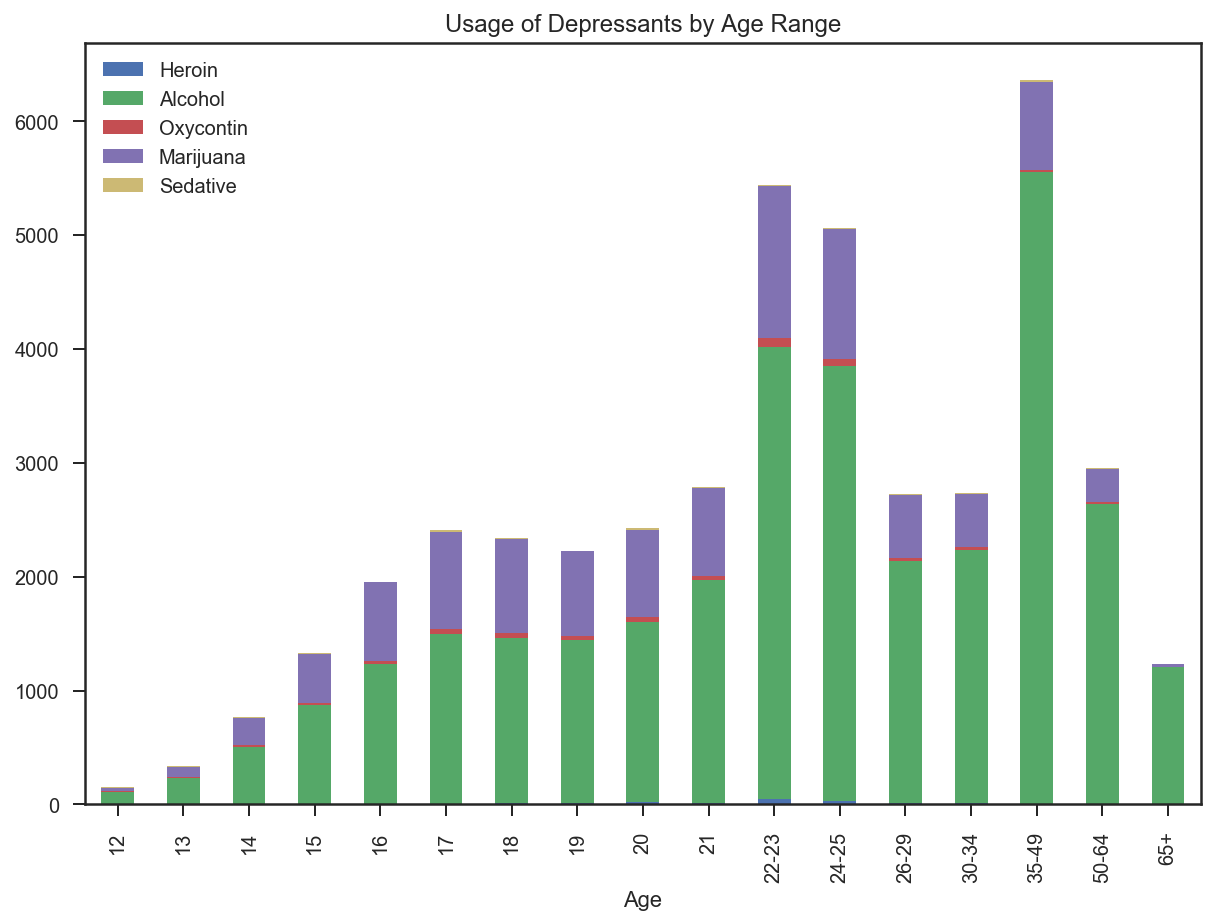

In [46]:
#Depressants
depressants_df = pd.DataFrame()

# for drug in _DEPRESSANTS:
#     depressants_df[drug] = drug_use_clean_df[drug]*drug_use_clean_df['N']/100

depressants_df['Heroin'] = drug_use_clean_df['Heroin Use']*drug_use_clean_df['N']/100
depressants_df['Alcohol'] = drug_use_clean_df['Alcohol Use']*drug_use_clean_df['N']/100
depressants_df['Oxycontin'] = drug_use_clean_df['Oxycontin Use']*drug_use_clean_df['N']/100
depressants_df['Marijuana'] = drug_use_clean_df['Marijuana Use']*drug_use_clean_df['N']/100
depressants_df['Sedative'] = drug_use_clean_df['Sedative Use']*drug_use_clean_df['N']/100

depressants_df.set_index(drug_use_clean_df['Age'], inplace=True)
depressants_df.plot(kind='bar', stacked=True, title='Usage of Depressants by Age Range')
drug_use_clean_df['Heroin Use']*drug_use_clean_df['N']/100

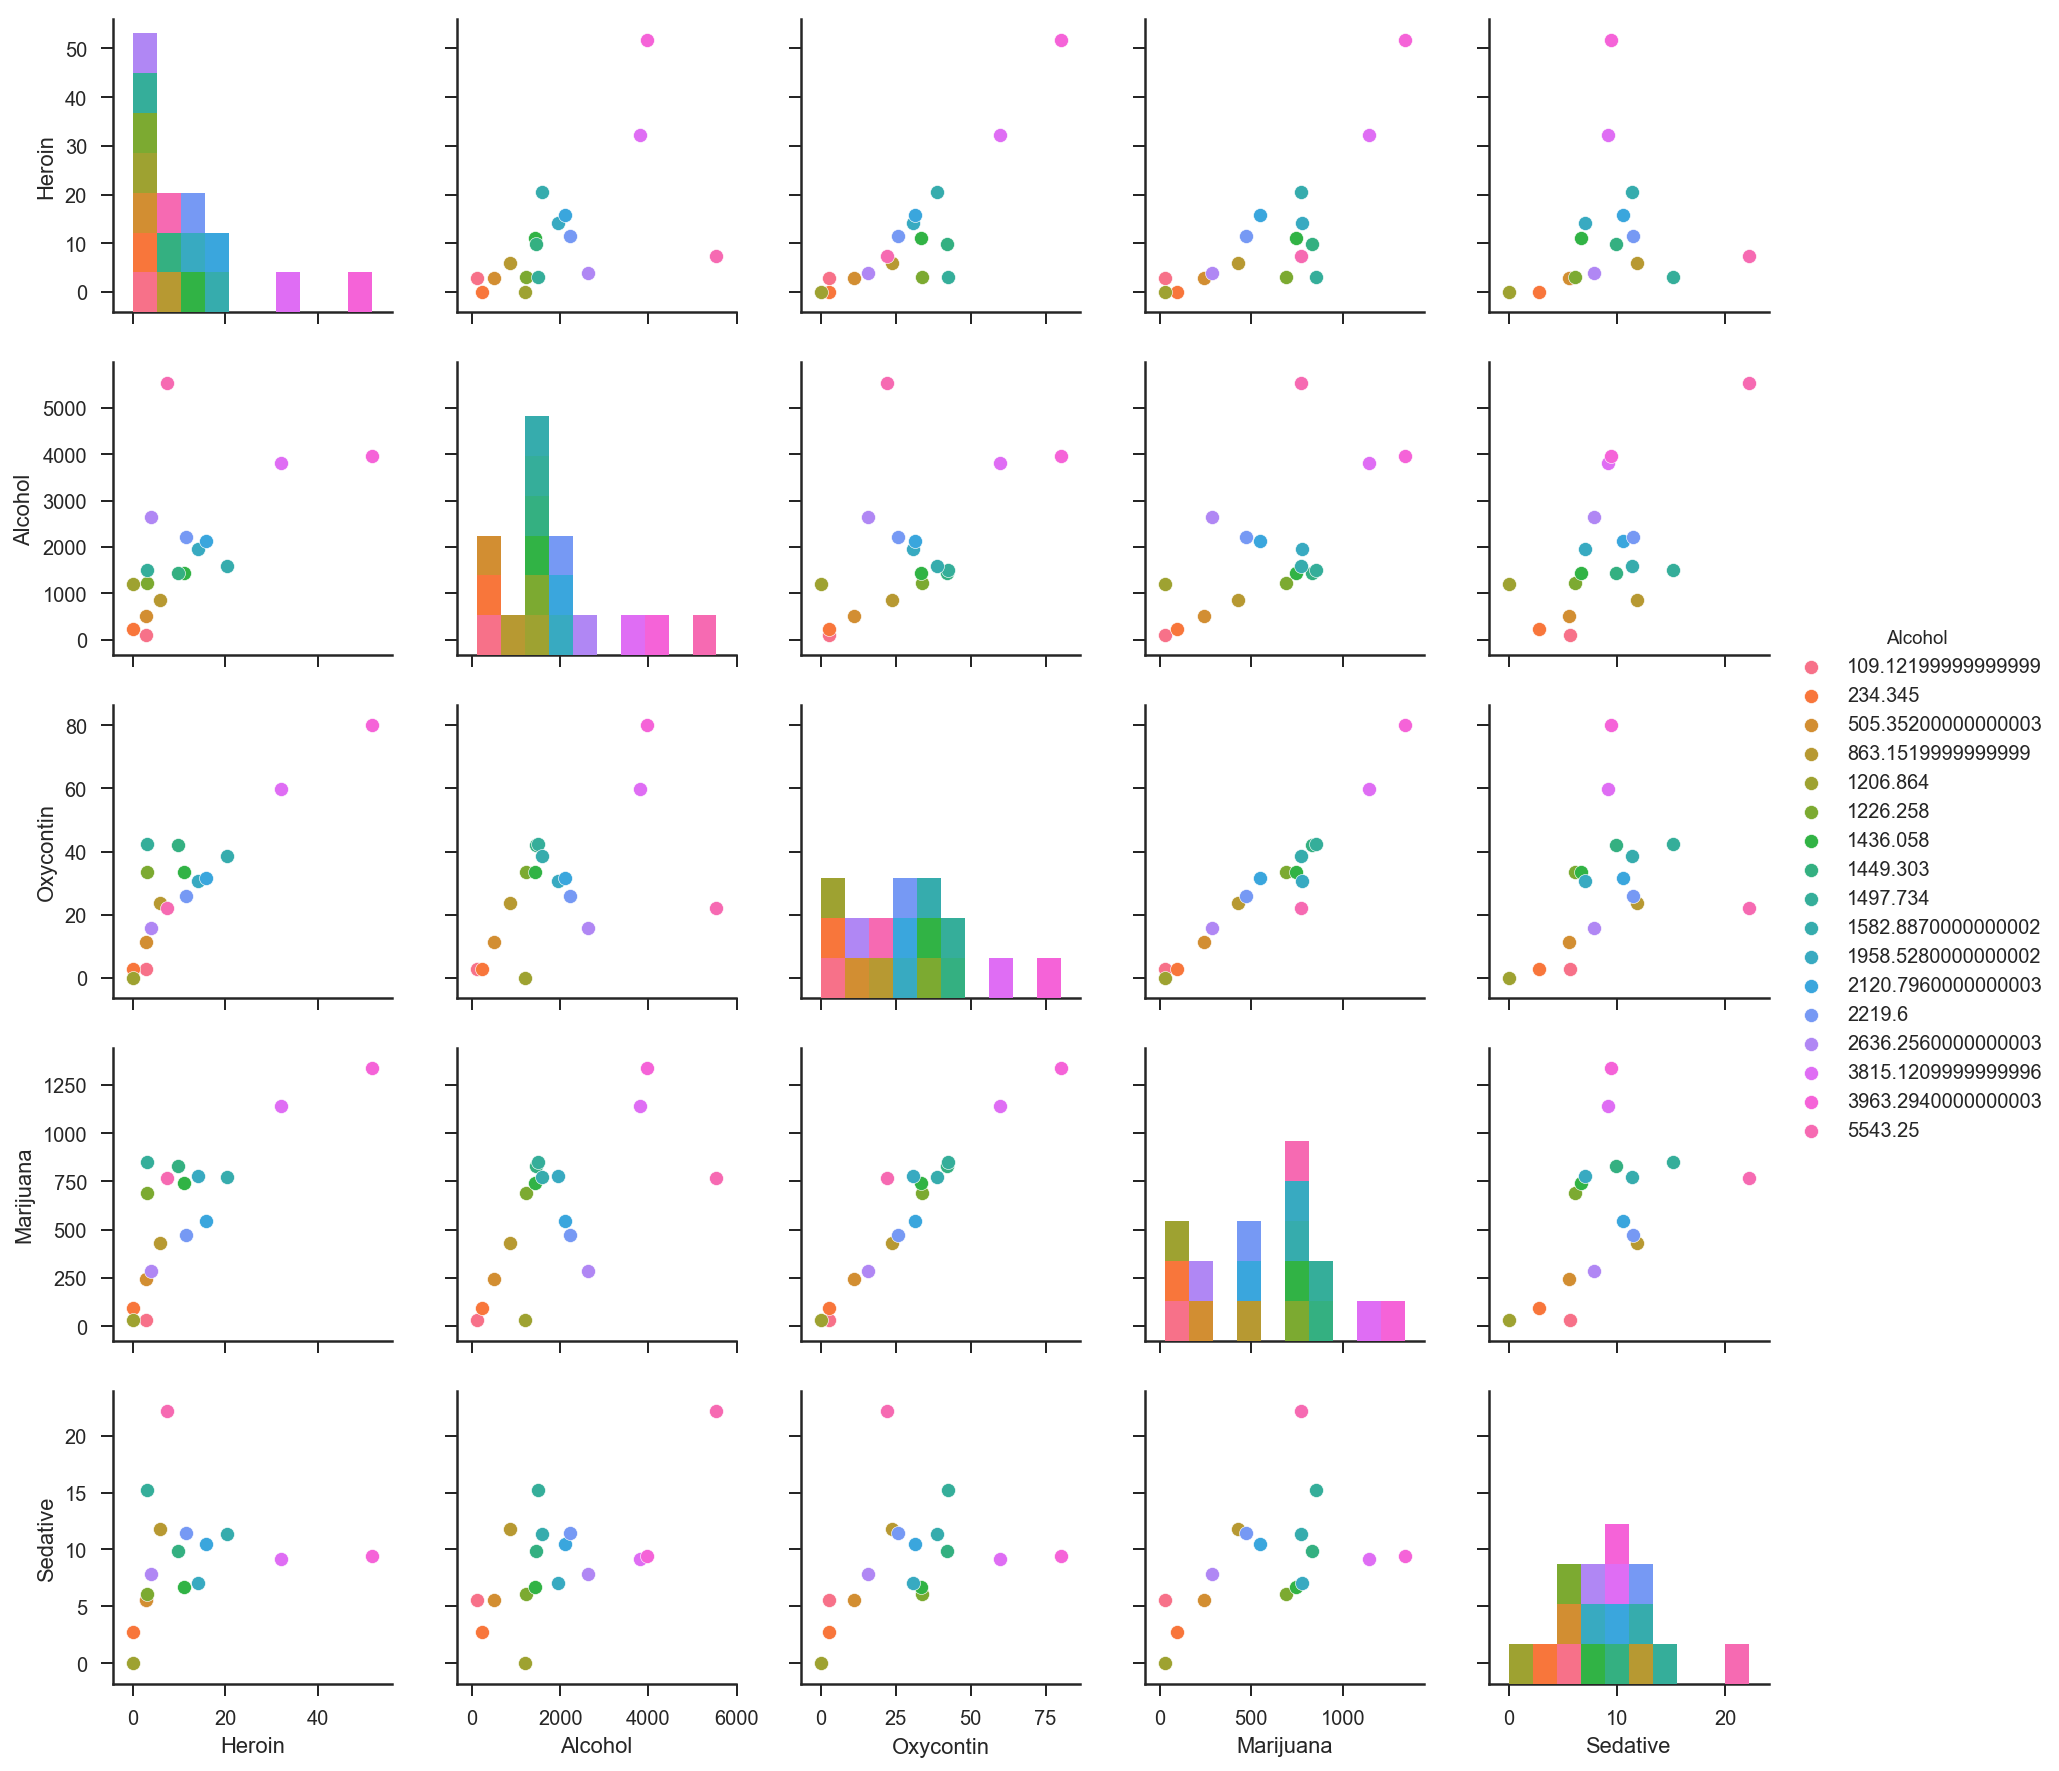

In [47]:
#Alcohol has the highest percentage, let's chart using pairplot
sns.set(style='ticks', color_codes=True)
sns.pairplot(depressants_df, hue='Alcohol')

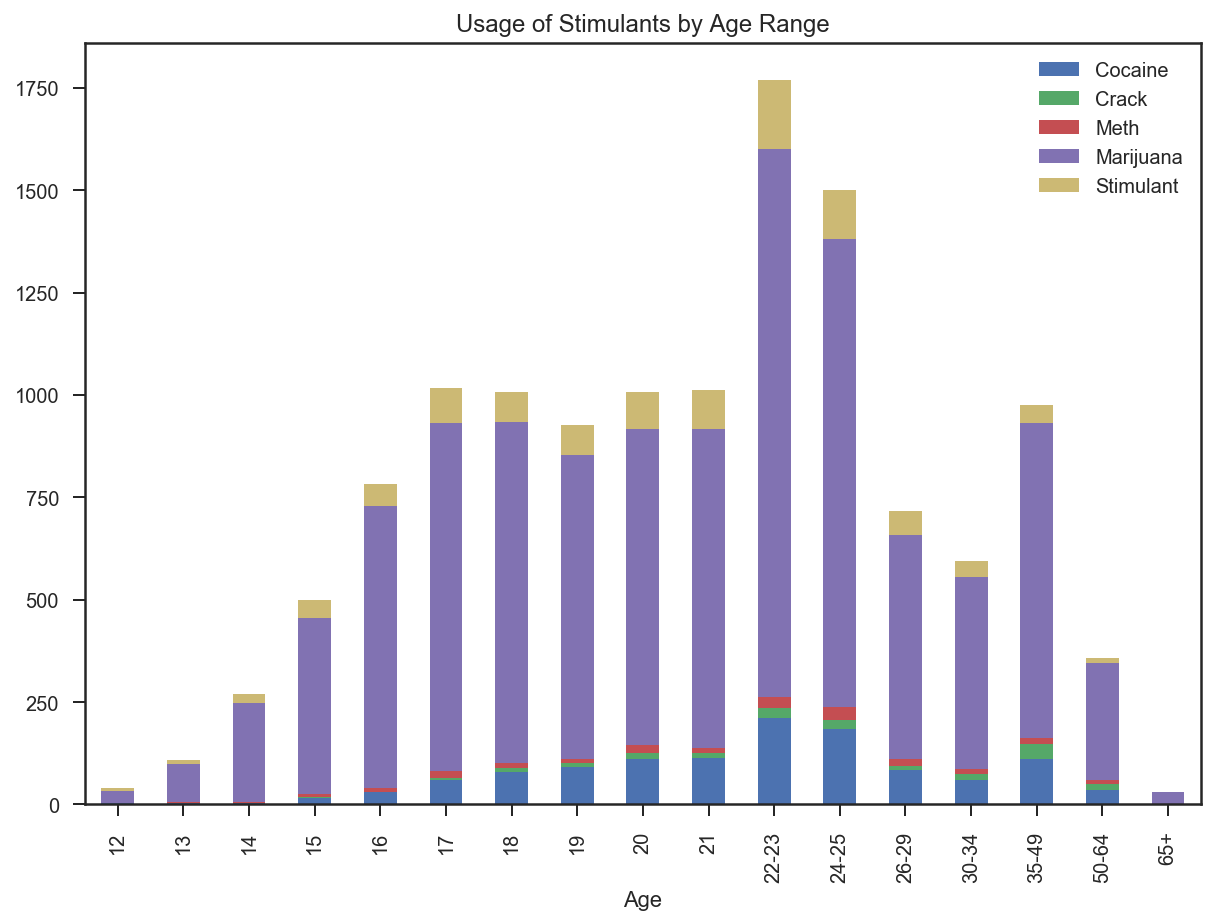

In [48]:
#Stimulants
stimulants_df = pd.DataFrame()

# for drug in _STIMULANTS:
#     stimulants_df[drug] = drug_use_clean_df[drug]*drug_use_clean_df['N']/100

stimulants_df['Cocaine'] = drug_use_clean_df['Cocaine Use']*drug_use_clean_df['N']/100
stimulants_df['Crack'] = drug_use_clean_df['Crack Use']*drug_use_clean_df['N']/100
stimulants_df['Meth'] = drug_use_clean_df['Meth Use']*drug_use_clean_df['N']/100
stimulants_df['Marijuana'] = drug_use_clean_df['Marijuana Use']*drug_use_clean_df['N']/100
stimulants_df['Stimulant'] = drug_use_clean_df['Stimulant Use']*drug_use_clean_df['N']/100

stimulants_df.set_index(drug_use_clean_df['Age'], inplace=True)
stimulants_df.plot(kind='bar', stacked=True, title='Usage of Stimulants by Age Range')

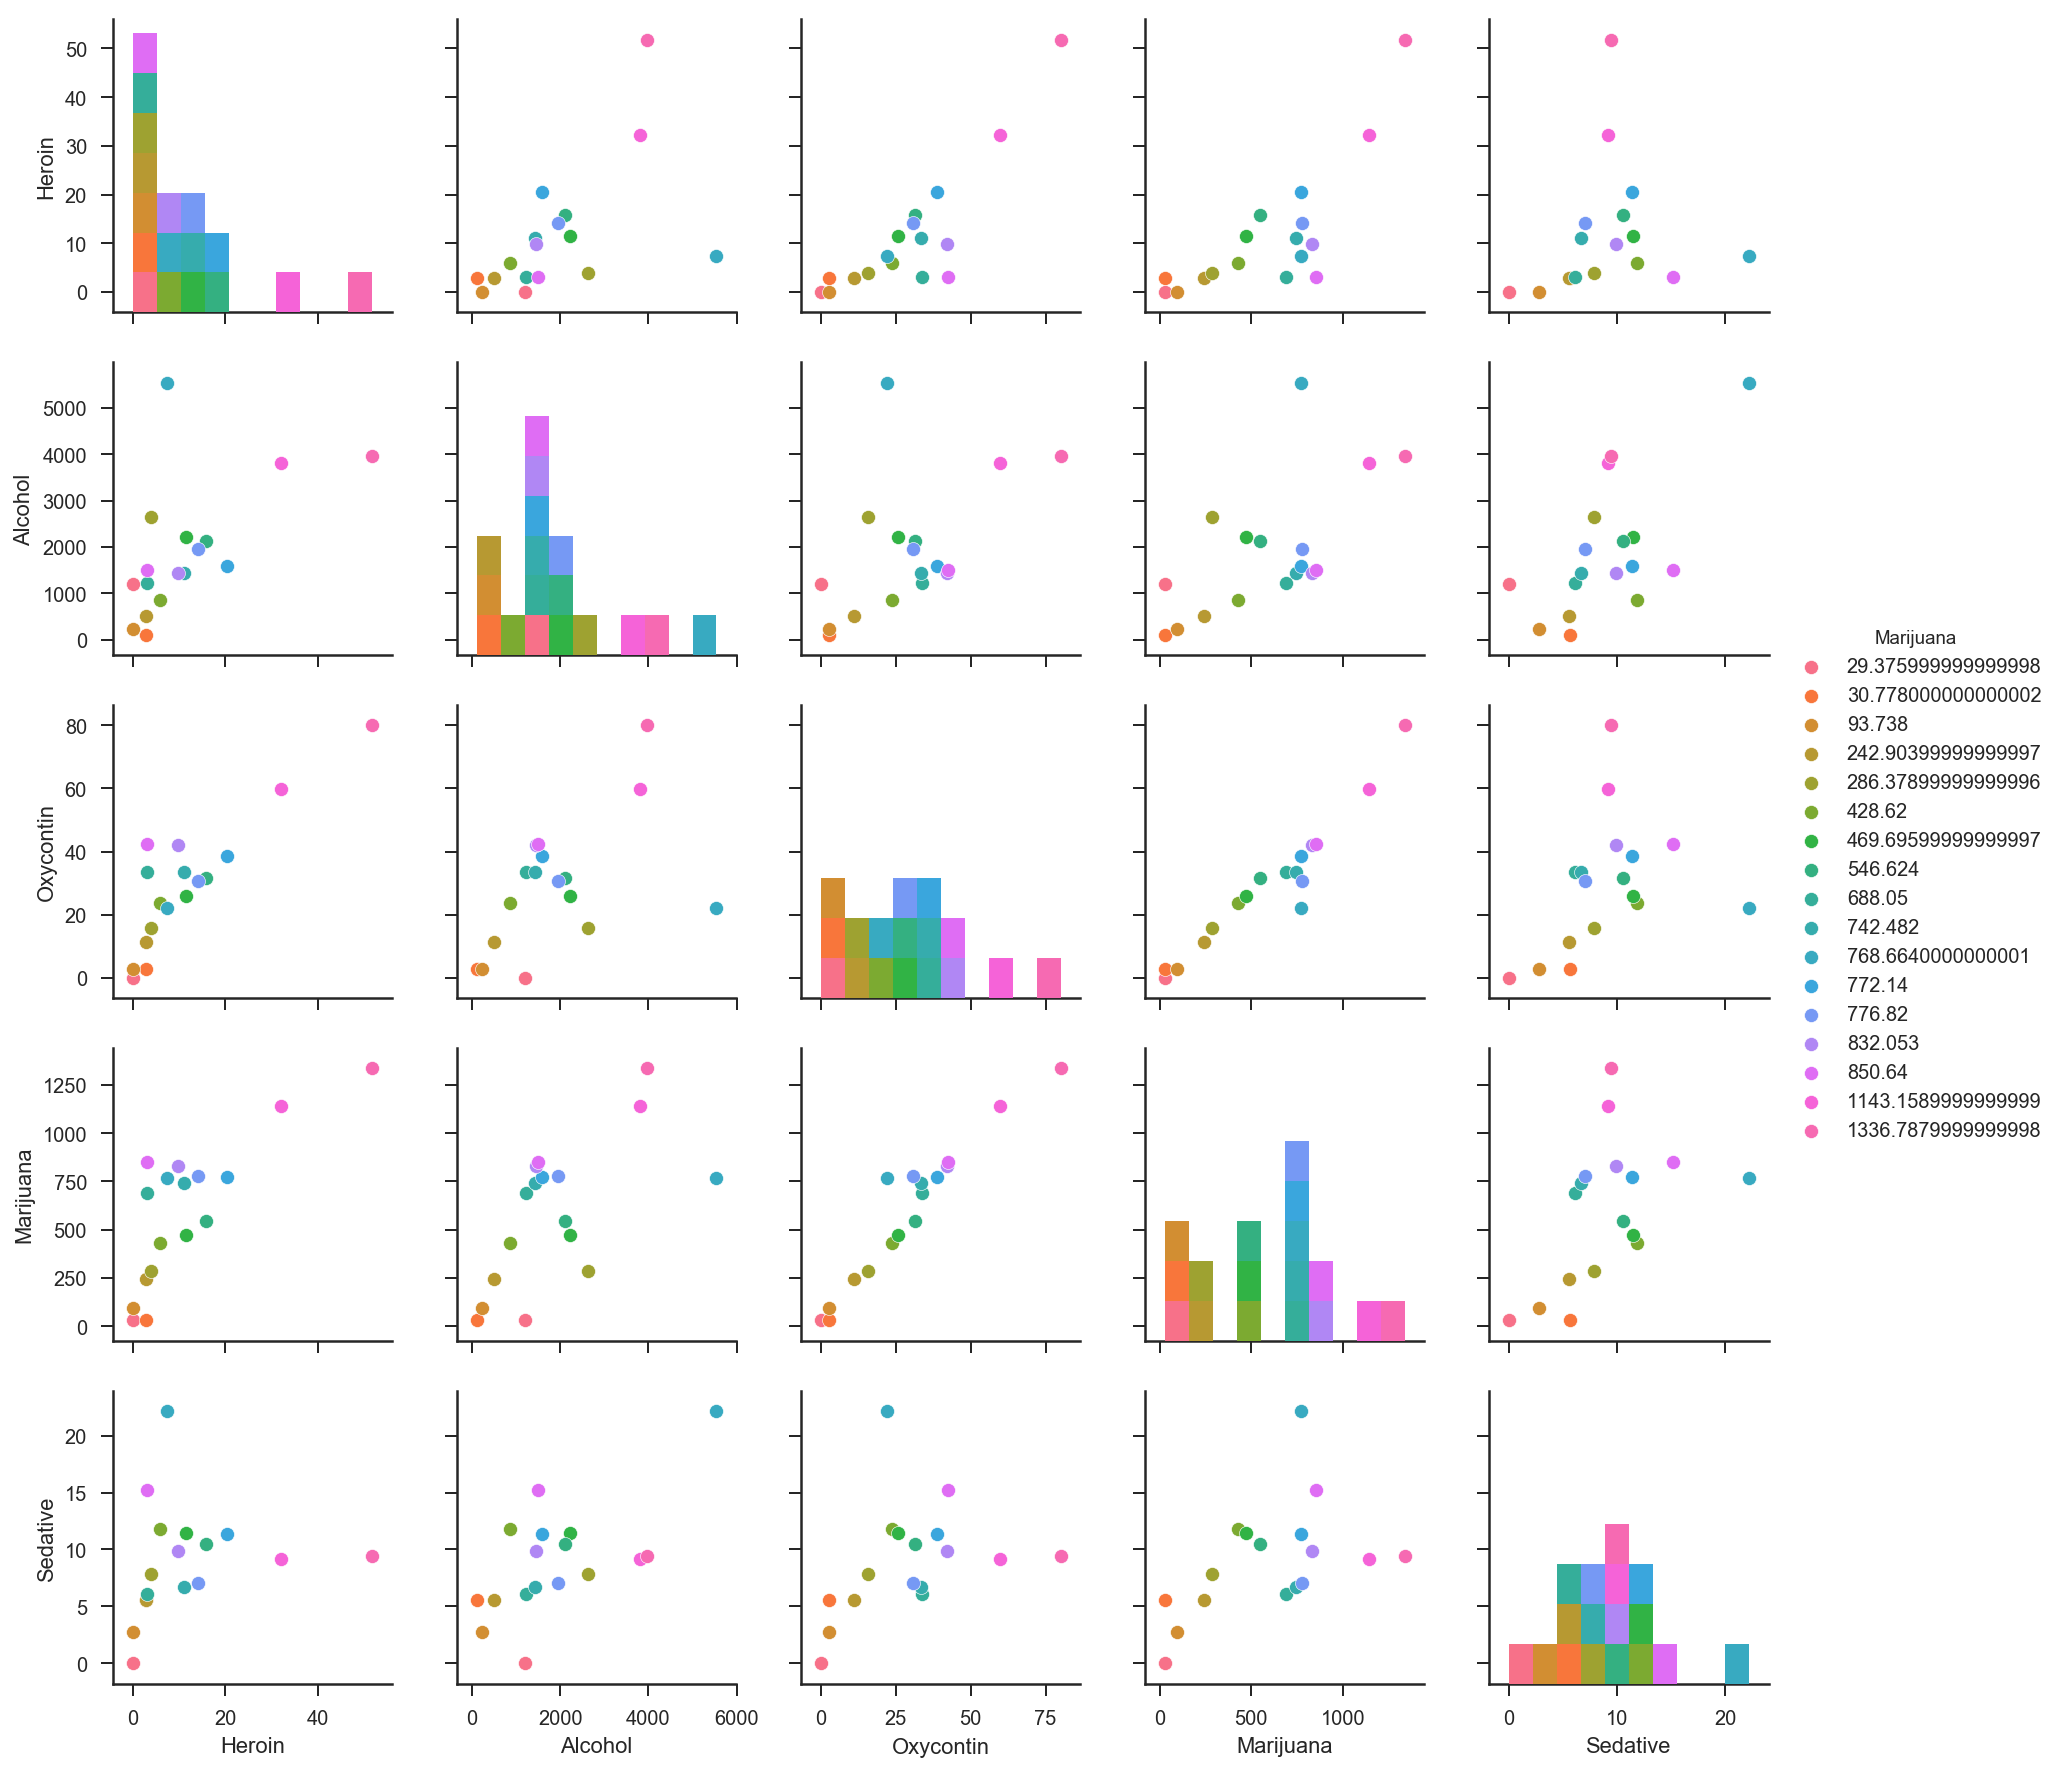

In [49]:
#Marijuana has the highest percentage, let's chart using pairplot
sns.set(style='ticks', color_codes=True)
sns.pairplot(depressants_df, hue='Marijuana')

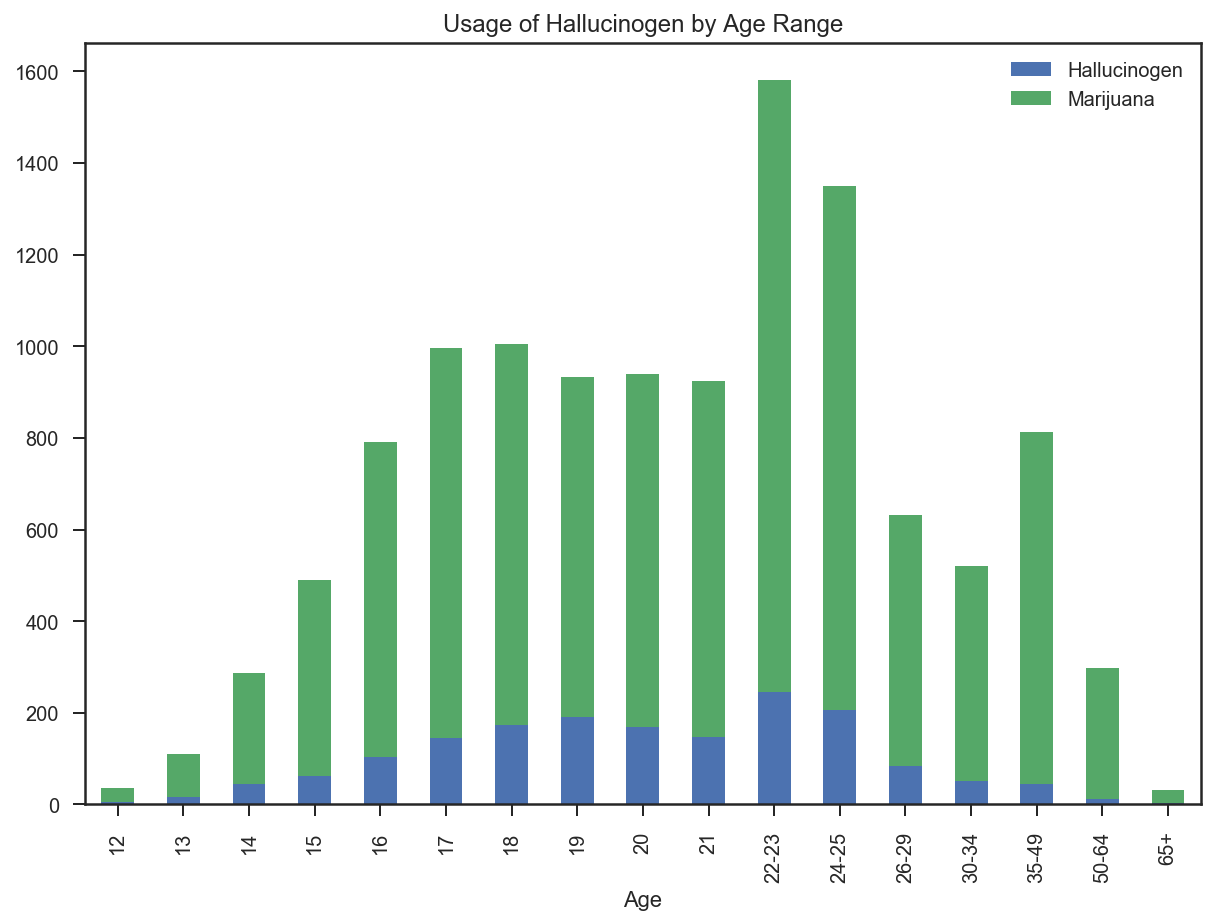

In [50]:
#Hallucinogens
hallucinogens_df = pd.DataFrame()

# for drug in _HALLUCINOGENS:
#     hallucinogens_df[drug] = drug_use_clean_df[drug]*drug_use_clean_df['N']/100

hallucinogens_df['Hallucinogen'] = drug_use_clean_df['Hallucinogen Use']*drug_use_clean_df['N']/100
hallucinogens_df['Marijuana'] = drug_use_clean_df['Marijuana Use']*drug_use_clean_df['N']/100

hallucinogens_df.set_index(drug_use_clean_df['Age'], inplace=True)
hallucinogens_df.plot(kind='bar', stacked=True, title='Usage of Hallucinogen by Age Range')

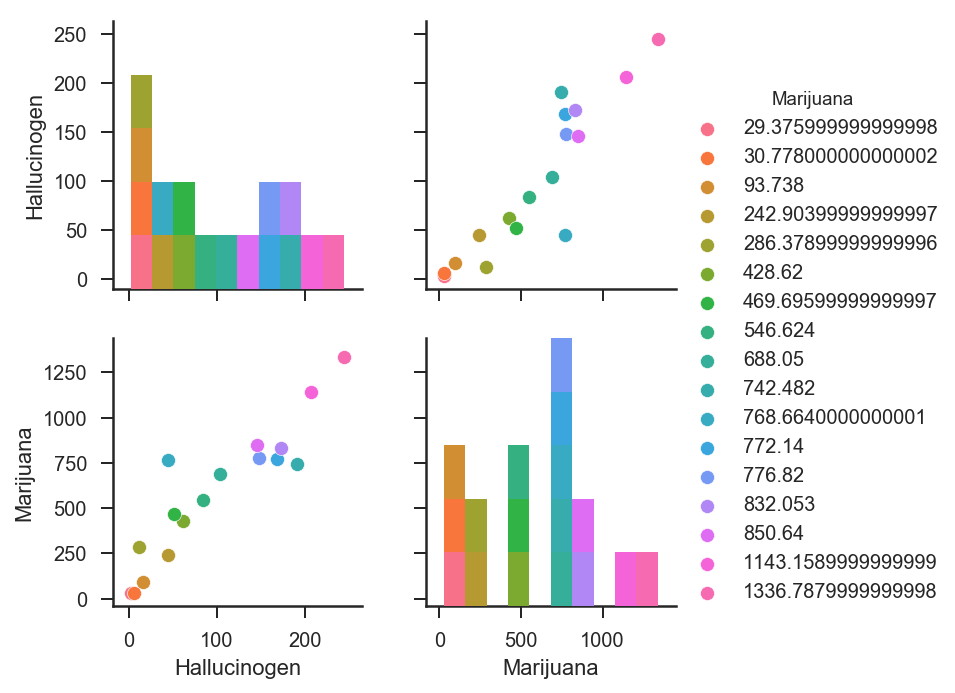

In [51]:
#Marijuana has the highest percentage, let's chart using pairplot
sns.set(style='ticks', color_codes=True)
sns.pairplot(hallucinogens_df, hue='Marijuana')

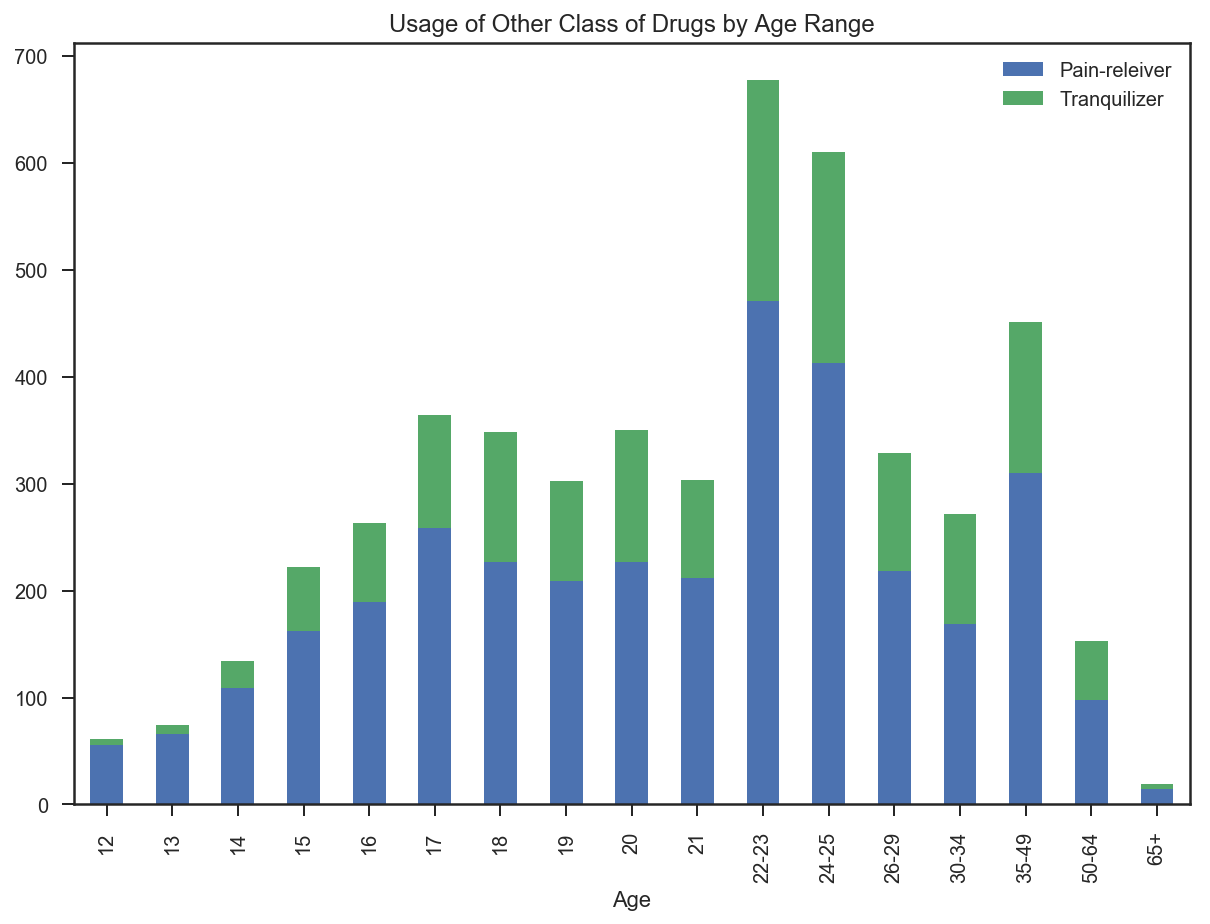

In [52]:
#Others
others_df = pd.DataFrame()

# for drug in _OTHERS:
#     others_df[drug] = drug_use_clean_df[drug]*drug_use_clean_df['N']/100

others_df['Pain-releiver'] = drug_use_clean_df['Pain-releiver Use']*drug_use_clean_df['N']/100
others_df['Tranquilizer'] = drug_use_clean_df['Tranquilizer Use']*drug_use_clean_df['N']/100

others_df.set_index(drug_use_clean_df['Age'], inplace=True)
others_df.plot(kind='bar', stacked=True, title='Usage of Other Class of Drugs by Age Range')

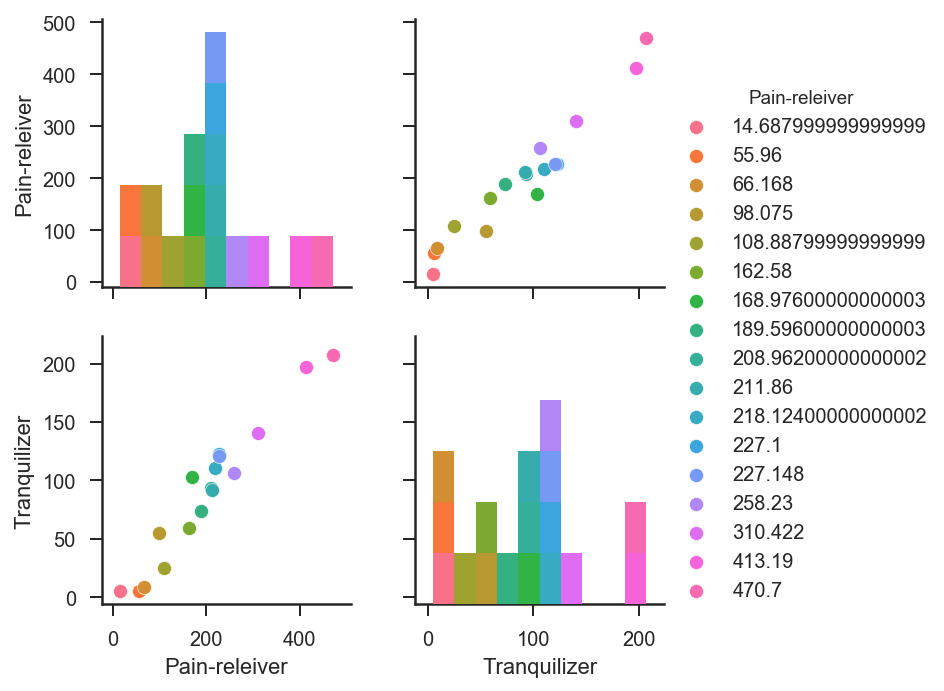

In [53]:
#Painkiller has the highest percentage, let's chart using pairplot
sns.set(style='ticks', color_codes=True)
sns.pairplot(others_df, hue='Pain-releiver')

In [54]:
#Check Correlation of drugs in each class
#Depressants
corr, p = spearmanr(depressants_df['Marijuana'], depressants_df['Alcohol'])
print(corr, p)

corr, p = pearsonr(depressants_df['Marijuana'], depressants_df['Alcohol'])
print(corr, p)

chisquare(depressants_df['Marijuana'], f_exp=depressants_df['Alcohol'])

0.6421568627450981 0.005445541252413795
0.6370240854015025 0.005956199427660356


Power_divergenceResult(statistic=16253.512929178523, pvalue=0.0)

In [55]:
#Stimulants
corr, p = spearmanr(stimulants_df['Marijuana'], stimulants_df['Cocaine'])
print(corr, p)

corr, p = pearsonr(stimulants_df['Marijuana'], stimulants_df['Cocaine'])
print(corr, p)

chisquare(stimulants_df['Marijuana'], f_exp=stimulants_df['Cocaine'])

0.8799019607843139 3.2179025965727283e-06
0.9111499938868189 3.6865438610478913e-07


/Users/neilcabrera/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:4567: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


Power_divergenceResult(statistic=inf, pvalue=0.0)

In [56]:
#Hallucinogens
corr, p = spearmanr(hallucinogens_df['Marijuana'], hallucinogens_df['Hallucinogen'])
print(corr, p)

corr, p = pearsonr(hallucinogens_df['Marijuana'], hallucinogens_df['Hallucinogen'])
print(corr, p)

chisquare(hallucinogens_df['Marijuana'], f_exp=hallucinogens_df['Hallucinogen'])

0.8848039215686275 2.389164653109702e-06
0.9134889528302798 3.0391030955309127e-07


Power_divergenceResult(statistic=52732.44876275368, pvalue=0.0)

In [57]:
#Others
corr, p = spearmanr(others_df['Pain-releiver'], others_df['Tranquilizer'])
print(corr, p)

corr, p = pearsonr(others_df['Pain-releiver'], others_df['Tranquilizer'])
print(corr, p)

chisquare(others_df['Pain-releiver'], f_exp=others_df['Tranquilizer'])

0.9632352941176472 5.740995055041279e-10
0.9700353615294943 1.263010629526128e-10


Power_divergenceResult(statistic=3179.937126087829, pvalue=0.0)

**Report**



...

In [58]:
#Findings
#1) Ages 22 to 23 has the highest usage of drugs among the drug classifications, followed by 24 to 25
#2) Marijuana which can act as Depressant, Stimulant and Hallucinogen is the most popular in terms of usage.
#     This could be due to Marijuana being treated as a recreational drug. It also points that the drug is easily accesible
#3) Tests between the 2 highest drugs per class shows strong correlation and p value of close to 0
#     With the aim of 95% confidence level, I fail to reject H0.
#     However since the value of p is close to 0, it may not be that meaningful and will require more tests or additional
#     data. Another area that can be explored is to narrow the test by age range to only young adults
#     So for now, I will only take the correlation value as the outcome of my tests
#4) Investigation should be done on why there is easy accesibility to Marijuana and what are the effects of reducing
#     the population access to this drug. Will it drive people to go for other types of drugs which are more harmful?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [59]:
#Check the Rate, Verbal and Math percentile column and calculate the skew to see if it's close to normal distribution
sats_df3['Rate'].describe(), sats_df3['Rate'].skew()

(count    52.000000
 mean     37.153846
 std      27.301788
 min       4.000000
 25%       9.000000
 50%      33.500000
 75%      63.500000
 max      82.000000
 Name: Rate, dtype: float64, 0.14553443408946343)

In [60]:
sats_df3['Math Percentile'].describe(), sats_df3['Math Percentile'].skew()

(count     52.000000
 mean      50.961538
 std       29.112645
 min        1.923077
 25%       26.201923
 50%       50.961538
 75%       75.480769
 max      100.000000
 Name: Math Percentile, dtype: float64, 0.005977630634012296)

In [61]:
sats_df3['Verbal Percentile'].describe(), sats_df3['Verbal Percentile'].skew()

(count     52.000000
 mean      50.961538
 std       29.133187
 min        1.923077
 25%       25.961538
 50%       51.442308
 75%       75.000000
 max      100.000000
 Name: Verbal Percentile, dtype: float64, -0.0003959067453654038)

In [62]:
#Define my outliers as anything above/below 3*std and filter out to see the change in descriptive stats
ll = sats_df3['Math Percentile'] >= 2.5
ul = sats_df3['Math Percentile'] <= 97.5
sats_df3[ll & ul]['Math Percentile'].describe()

count    49.000000
mean     50.000000
std      27.443179
min       3.846154
25%      26.923077
50%      50.000000
75%      73.076923
max      96.153846
Name: Math Percentile, dtype: float64

In [63]:
#Define my outliers as anything above/below 3*std and filter out to see the change in descriptive stats
ll = sats_df3['Verbal Percentile'] >= 2.5
ul = sats_df3['Verbal Percentile'] <= 97.5
sats_df3[ll & ul]['Math Percentile'].describe()

count    49.000000
mean     49.960754
std      27.511848
min       1.923077
25%      26.923077
50%      50.000000
75%      73.076923
max      96.153846
Name: Math Percentile, dtype: float64

In [64]:
#After removing the outliers, the descriptive stats have changed for both Verbal and Math


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [65]:
stats.spearmanr(sats_df3['Verbal'], sats_df3['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [66]:
stats.pearsonr(sats_df3['Verbal'], sats_df3['Math'])

(0.899870852544429, 1.192002673306768e-19)

In [67]:
#Pearson is used to check for linear correlation. Spearman is also similar to Pearson with the main difference is that
#it also takes into consideration the ranking

#The Pearson correlation evaluates the linear relationship between two continuous variables.
#The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. 
#Spearman correlation is often used to evaluate relationships involving ordinal variables.

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [68]:
sats_df3['Rate Percentile'] = pd.Series([stats.percentileofscore(sats_df3['Rate'].values, value) for value in sats_df3['Rate'].values])
sats_df3[sats_df3['State'] == 'CA']

,State,Rate,Verbal,Math,Math Percentile,Verbal Percentile,Rate Percentile
23,CA,51,498,517,50.0,16.346154,56.730769


In [69]:
#Percentile is a good indicator for ranking and ranking is important for spearman rank correlation

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

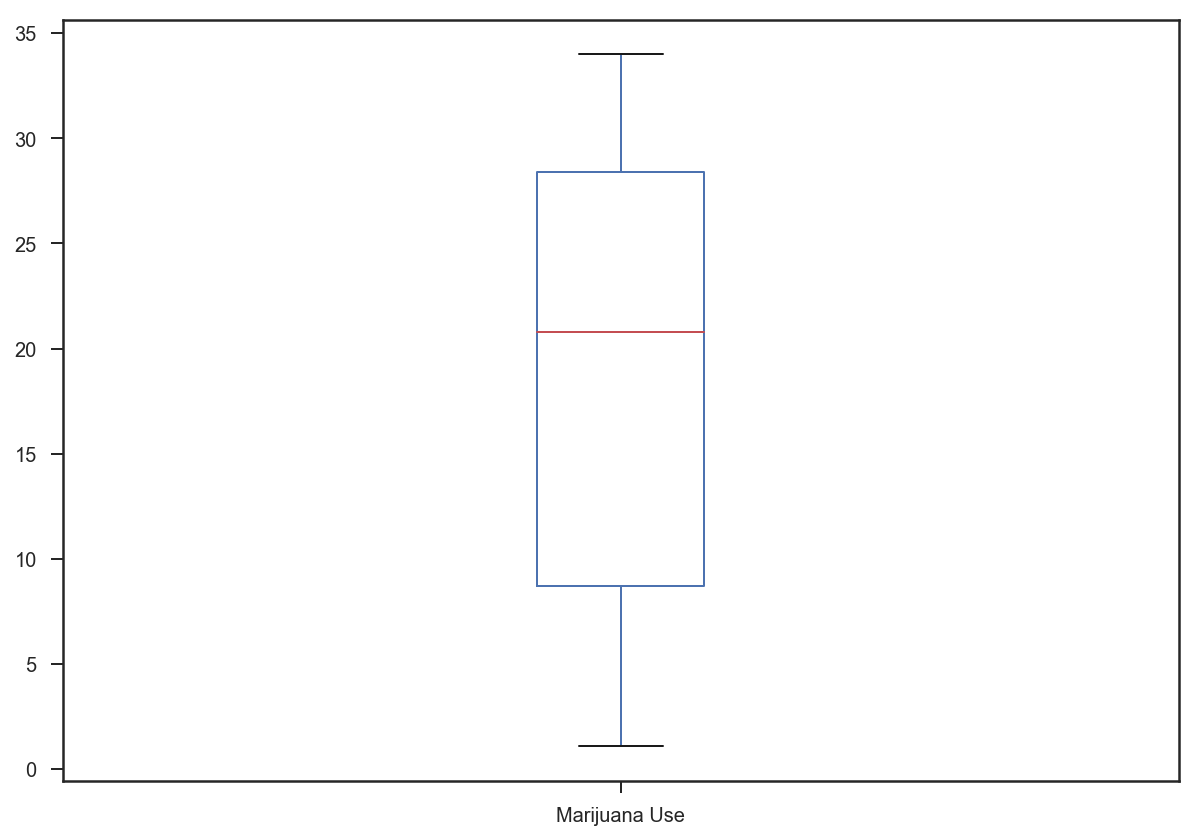

In [70]:
#If the distribution is normal, can use the percentile scoring to immediately see which values are outside the
#range of 3*std which can be treated as outliers

#Use Box Plot for Marijuana
drug_use_clean_df['Marijuana Use'].plot.box()

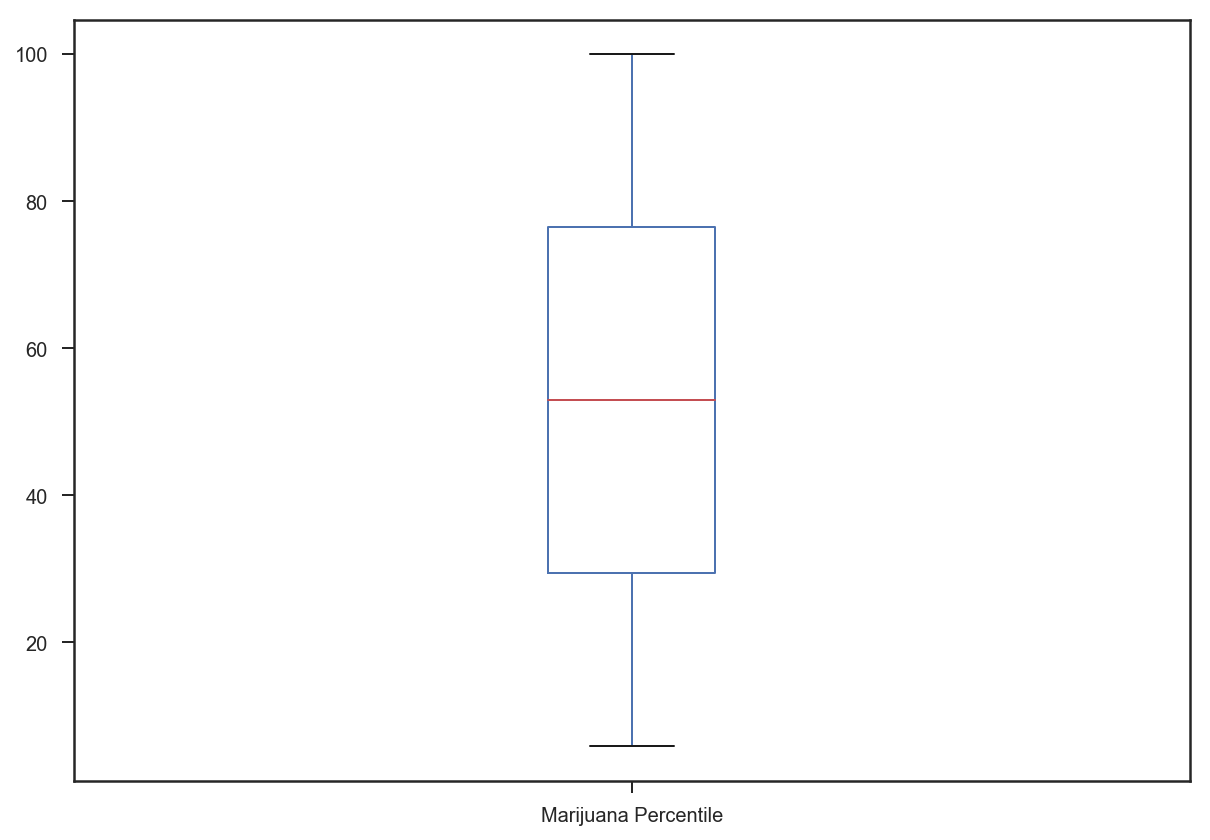

In [71]:
#Create a new column for percentile of marijuana
drug_use_clean_df['Marijuana Percentile'] = pd.Series([stats.percentileofscore(drug_use_clean_df['Marijuana Use'].values, value) for value in drug_use_clean_df['Marijuana Use'].values])

#Use Box Plot for Marijuana
drug_use_clean_df['Marijuana Percentile'].plot.box()

In [72]:
ll = drug_use_clean_df['Marijuana Percentile'] >= 2.5
ul = drug_use_clean_df['Marijuana Percentile'] <= 97.5
drug_use_clean_df[ll & ul]['Marijuana Percentile'].describe()

count    16.000000
mean     50.000000
std      28.005602
min       5.882353
25%      27.941176
50%      50.000000
75%      72.058824
max      94.117647
Name: Marijuana Percentile, dtype: float64

In [73]:
drug_use_clean_df[ll & ul][['Age', 'Marijuana Use', 'Marijuana Percentile']]

,Age,Marijuana Use,Marijuana Percentile
0,12,1.1,5.882353
1,13,3.4,17.647059
2,14,8.7,29.411765
3,15,14.5,41.176471
4,16,22.5,58.823529
5,17,28.0,70.588235
6,18,33.7,94.117647
7,19,33.4,88.235294
9,21,33.0,82.352941
10,22-23,28.4,76.470588


In [78]:
from scipy.stats import shapiro
stat, p = shapiro(drug_use_clean_df['Marijuana Use'])

In [79]:
stat, p

(0.9099645614624023, 0.09990019351243973)